## 1.	The analysis is to be performed for NASDAQ 100. Check the stock symbols of the companies to be analyzed in the ‘Nasdaq 100 Market cap.xlsx’. Read only the relevant files from the folder

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# To install pandas_datareader

# run the code below

# pip install pandas_datareader

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas_datareader as datareader
import datetime as dt
from dateutil.relativedelta import relativedelta as rd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
# import warnings 
# warnings.filterwarnings('ignore')

In [9]:
address = '/content/drive/MyDrive/Capstone Job Guaranty/Capstone 2/Problem  - For Learners/'

In [10]:
nasdaq_symbol = pd.read_excel(address + 'Nasdaq 100 Market cap.xlsx')

In [11]:
nasdaq100_metrics_ratios = pd.read_excel(address + 'nasdaq100_metrics_ratios.xlsx')

In [12]:
os.chdir(address)

In [13]:
file_count = 0
list_files = []
abs_files = []
for file_name in nasdaq_symbol.Symbol:
    try :
        file_path = os.getcwd() + '/NASDAQ_DATA/' +file_name +'.csv'
        temp_file = pd.read_csv(file_path)
        temp_file.insert(loc = 0, column = 'Symbol', value = file_name)
        temp_file.Date = pd.to_datetime(temp_file.Date, infer_datetime_format = True)
        list_files.append(temp_file)
    except :
        abs_files.append(file_name)
        continue

In [14]:
len(list_files)

102

In [15]:
master_data = pd.concat(list_files)

In [16]:
master_data.columns

Index(['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close'],
      dtype='object')

In [17]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474247 entries, 0 to 1164
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Symbol     474247 non-null  object        
 1   Date       474247 non-null  datetime64[ns]
 2   High       474247 non-null  float64       
 3   Low        474247 non-null  float64       
 4   Open       474247 non-null  float64       
 5   Close      474247 non-null  float64       
 6   Volume     474247 non-null  float64       
 7   Adj Close  474247 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 32.6+ MB


In [18]:
min_max_date = master_data.groupby('Symbol')['Date'].agg([min, max])
min_max_date

,min,max
Symbol,,
AAPL,1999-12-31,2022-10-28
ABNB,2020-12-10,2022-10-28
ADBE,1999-12-31,2022-10-28
ADI,1999-12-31,2022-10-28
ADP,1999-12-31,2022-10-28
...,...,...
WBA,1999-12-31,2022-10-28
WDAY,2012-10-12,2022-10-28
XEL,1999-12-31,2022-10-28


In [19]:
# lets say for analysis we are using last 10 years data 
start = dt.datetime(2002, 11, 1)
start

datetime.datetime(2002, 11, 1, 0, 0)

In [20]:
end = dt.datetime(2022, 10, 24)

In [21]:
master_data.shape

(474247, 8)

In [22]:
master_data.describe(datetime_is_numeric = True)

,Date,High,Low,Open,Close,Volume,Adj Close
count,474247,474247.000000,474247.000000,474247.000000,474247.000000,4.742470e+05,474247.000000
mean,2012-05-02 11:42:51.118425600,78.122040,75.990176,77.074417,77.076235,1.843704e+07,73.076970
min,1999-12-31 00:00:00,0.032000,0.025500,0.027500,0.026500,0.000000e+00,0.022405
25%,2006-11-03 00:00:00,16.683626,16.100000,16.389999,16.391222,1.581600e+06,13.235787
50%,2012-10-10 00:00:00,36.349998,35.389999,35.880001,35.889999,3.579800e+06,29.216110
75%,2018-01-24 00:00:00,76.440002,74.510002,75.480003,75.500000,1.046985e+07,70.079777
max,2022-10-28 00:00:00,2715.659912,2632.219971,2680.000000,2703.260010,7.421641e+09,2703.260010
std,NaN,158.651773,154.511824,156.644407,156.581800,7.172834e+07,156.939467


In [23]:
master_data[(master_data.Date >= start) & (master_data.Date <= end)].groupby('Symbol').size().sort_values()

Symbol
CEG      193
ABNB     471
LCID     529
DDOG     781
CRWD     850
        ... 
GILD    5029
FISV    5029
FAST    5029
INTU    5029
AAPL    5029
Length: 102, dtype: int64

In [24]:
master_data = master_data[(master_data.Date >= start) & (master_data.Date <= end)]

In [25]:
master_data.reset_index(drop = True, inplace = True)

In [26]:
master_data.head()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
0,AAPL,2002-11-01,0.294643,0.283750,0.284643,0.292143,189828800.0,0.249028
1,AAPL,2002-11-04,0.310357,0.291964,0.294643,0.301607,376818400.0,0.257095
2,AAPL,2002-11-05,0.302857,0.291964,0.299107,0.301786,210694400.0,0.257248
3,AAPL,2002-11-06,0.309286,0.298214,0.305000,0.307500,216389600.0,0.262119
4,AAPL,2002-11-07,0.305357,0.282321,0.302500,0.285714,336179200.0,0.243548


In [27]:
master_data.tail()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
426754,ZS,2022-10-18,152.500000,146.679993,151.100006,149.690002,2059400.0,149.690002
426755,ZS,2022-10-19,151.210007,146.000000,147.910004,148.770004,1594500.0,148.770004
426756,ZS,2022-10-20,154.880005,148.848999,149.279999,150.229996,1709500.0,150.229996
426757,ZS,2022-10-21,150.919998,142.710007,148.979996,150.479996,2140900.0,150.479996
426758,ZS,2022-10-24,151.460007,144.300003,151.360001,148.669998,1375200.0,148.669998


In [28]:
master_data.shape

(426759, 8)

## 4.	Collate both the files imported in the last step to have the fields ‘Market cap’ as well as ‘Last sale’ along with the different metrics/ratios already present in ‘nasdaq100_metrics_ratios.xlsx’.

In [29]:
metrics = pd.merge(nasdaq100_metrics_ratios, nasdaq_symbol[['Symbol','Market Cap', 'Last Sale']], 
         left_on= 'symbol', right_on='Symbol').drop(columns = 'Symbol')

In [30]:
metrics.head()

,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_2022,...,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest,Market Cap,Last Sale
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,0.74,0.83,1.08,NaN,...,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11,2625740143000,$151.45
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,0.64,0.36,0.50,NaN,...,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00,69569944167,$116.65
2,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.54,0.57,0.57,0.61,NaN,...,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54,149144569000,$320.81
3,ADI,Analog Devices,Information Technology,Semiconductors,0.36,0.30,0.29,0.26,0.20,NaN,...,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30,75484763090,$146.76
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,0.34,0.35,0.33,0.29,...,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02,98332762096,$236.78


In [31]:
metrics.columns = metrics.columns.str.lower().str.replace(' ', '_')

## 5. A variable with very small variance does not add much value in model building. List those variables which have variance less than .005. Eliminate these variables.

In [32]:
var_data = metrics.var(numeric_only= True).sort_values(ascending= True)
cols = var_data[var_data < 0.005].index
cols

Index(['capex_to_revenue_2022', 'inventory_to_revenue_2022',
       'inventory_to_revenue_2018', 'inventory_to_revenue_2017'],
      dtype='object')

In [33]:
metrics.drop(columns = cols, inplace = True)

## 6.	In the file ‘nasdaq100_metrics_ratios.xlsx’, there are missing values in many variables. Delete those variables which have around 30% or more values missing.

In [34]:
metrics.shape

(102, 281)

In [35]:
missing_perc = metrics.isna().sum() /metrics.shape[0]*100
missing_perc.sort_values(ascending = False)

goodwill_to_asset_latest            100.000000
days_inventory_2022                  88.235294
inventory_turnover_2022              88.235294
price_earnings_growth_ratio_2022     87.254902
rate_of_return_2022                  85.294118
                                       ...    
enterprise_value_to_ebit_latest       0.000000
equity_to_assets_latest               0.000000
equity_to_assets_2021                 0.000000
equity_to_assets_2020                 0.000000
last_sale                             0.000000
Length: 281, dtype: float64

In [36]:
metrics.drop(columns = missing_perc[missing_perc >30].index, inplace = True)

In [37]:
metrics.head()

,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_latest,...,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest,market_cap,last_sale
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,0.74,0.83,1.08,0.24,...,71.04,-7.69,11.34,21.69,5.36,11.94,38.50,5.11,2625740143000,$151.45
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,0.64,0.36,0.50,0.12,...,96.46,609.09,NaN,40.08,31.58,31.27,-18.11,41.00,69569944167,$116.65
2,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.54,0.57,0.57,0.61,0.17,...,-7.48,-3.97,25.51,24.45,25.21,16.86,23.69,15.54,149144569000,$320.81
3,ADI,Analog Devices,Information Technology,Semiconductors,0.36,0.30,0.29,0.26,0.20,0.06,...,5.49,6.67,36.64,10.91,-3.22,-6.25,21.07,26.30,75484763090,$146.76
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,0.34,0.35,0.33,0.06,...,6.49,19.05,NaN,8.65,7.16,4.84,4.95,12.02,98332762096,$236.78


In [38]:
metrics.shape

(102, 201)

In [39]:
metrics.columns

Index(['symbol', 'company', 'sector', 'subsector', 'asset_turnover_2017',
       'asset_turnover_2018', 'asset_turnover_2019', 'asset_turnover_2020',
       'asset_turnover_2021', 'asset_turnover_latest',
       ...
       'yoy_eps_growth_2021', 'yoy_eps_growth_latest',
       'yoy_revenue_growth_2017', 'yoy_revenue_growth_2018',
       'yoy_revenue_growth_2019', 'yoy_revenue_growth_2020',
       'yoy_revenue_growth_2021', 'yoy_revenue_growth_latest', 'market_cap',
       'last_sale'],
      dtype='object', length=201)

In [40]:
metrics.isna().sum().sort_values(ascending = False)

scaled_net_operating_assets_2017      30
interest_coverage_2018                30
yoy_ebitda_growth_2017                30
price_earnings_growth_ratio_latest    30
yoy_revenue_growth_2017               30
                                      ..
enterprise_value_to_ebit_latest        0
equity_to_assets_latest                0
equity_to_assets_2021                  0
equity_to_assets_2020                  0
last_sale                              0
Length: 201, dtype: int64

## 7.	For the variables which have less than 30% values missing, perform missing value imputation. Missing value imputation should be done considering the sector of the company.

In [41]:
metrics_copy = metrics.copy()

In [42]:
missing_cals = metrics_copy.isna().sum()
msng_cols = missing_cals[missing_cals > 0].sort_values(ascending = False).index.tolist()
msng_cols1 = msng_cols.copy()

In [43]:
len(msng_cols1)

149

In [44]:
for col in msng_cols :
    med_values = metrics_copy.groupby('sector')[col].median()
    for sec in med_values.index:
        metrics_copy.loc[(metrics_copy[col].isna() )& (metrics_copy.sector == sec), col] = med_values[sec]

In [45]:
missing_cals = metrics_copy.isna().sum()
msng_cols = missing_cals[missing_cals > 0].sort_values(ascending = False).index.tolist()
msng_cols

['mscore_2019',
 'mscore_2020',
 'mscore_2021',
 'price_to_free_cashflow_2019',
 'price_to_free_cashflow_2020',
 'price_to_free_cashflow_2021',
 'price_to_free_cashflow_latest']

In [46]:
# check the rows where these values are missing

In [47]:
metrics_copy.isna().any()

symbol                       False
company                      False
sector                       False
subsector                    False
asset_turnover_2017          False
                             ...  
yoy_revenue_growth_2020      False
yoy_revenue_growth_2021      False
yoy_revenue_growth_latest    False
market_cap                   False
last_sale                    False
Length: 201, dtype: bool

In [48]:
metrics_copy[metrics_copy.isna().sum(axis =1 ) >0]

,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_latest,...,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest,market_cap,last_sale
6,AEP,American Electric Power,Utilities,Electric Utilities,0.24,0.24,0.22,0.19,0.20,0.05,...,12.22,-11.30,-6.01,4.75,-4.22,-4.50,11.54,17.91,44807878084,$87.22
21,CEG,Constellation Energy,Utilities,Multi-Utilities,0.27,0.26,0.39,0.36,0.41,0.12,...,-134.85,-81.82,2.68,4.75,-7.40,-6.98,11.73,30.91,28651255316,$87.66
37,EXC,Exelon,Utilities,Multi-Utilities,0.29,0.30,0.28,0.26,0.28,0.05,...,-13.43,14.63,4.51,5.00,-4.77,-4.36,9.68,5.14,37299734885,$37.545
99,XEL,Xcel Energy,Utilities,Multi-Utilities,0.27,0.26,0.24,0.22,0.24,0.06,...,6.09,3.45,2.68,0.77,-1.80,-1.54,13.93,10.17,34192428038,$62.51


In [49]:
metrics_copy.loc[metrics_copy.isna().sum(axis =1 ) >0,metrics_copy.isna().any()]

,mscore_2019,mscore_2020,mscore_2021,price_to_free_cashflow_2019,price_to_free_cashflow_2020,price_to_free_cashflow_2021,price_to_free_cashflow_latest
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Since the values are not available for for this particular sector we will fill these values using overall median values

In [50]:
for col in msng_cols:
    med_values = metrics_copy[col].median()
    metrics_copy.loc[metrics_copy[col].isna(), col] = med_values

In [51]:
missing_cals = metrics_copy.isna().sum()
msng_cols = missing_cals[missing_cals > 0].sort_values(ascending = False).index.tolist()
msng_cols

[]

## 8.	Perform in-depth analysis of COVID impact on stock prices. Create visuals to support the insights. The analysis must address the following:

    1.	Which industries and companies observed the max and which of them observed the min impact. You may use growth/degrowth as a measure of impact. Perform week over week, MoM (month over month), QoQ, YoY analysis as appropriate.

    2.	Which industries and companies recovered the fastest and which of them recovered the slowest.

In [52]:
y = master_data.loc[master_data.Symbol == 'AAPL','Adj Close' ]
x = master_data.loc[master_data.Symbol == 'AAPL','Date' ]

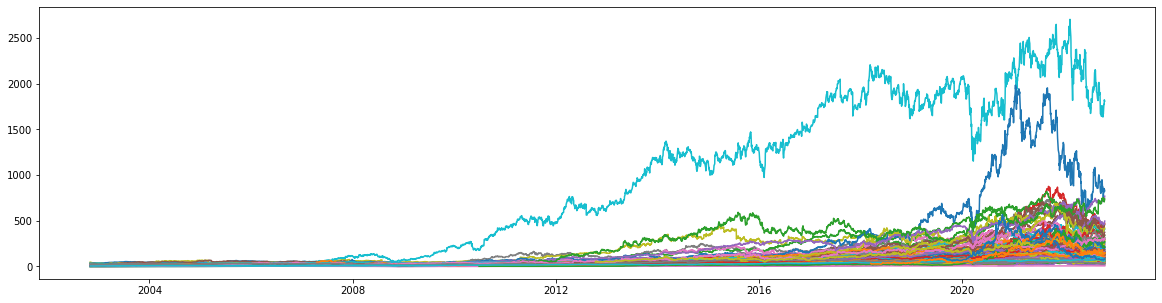

In [53]:
plt.figure(figsize = (20,5))
for s in master_data.Symbol.unique():
    y = master_data.loc[master_data.Symbol == s,'Adj Close' ]
    x = master_data.loc[master_data.Symbol == s,'Date' ]
    plt.plot(x,y, label = s)
    #plt.legend(loc = 'upper left')
plt.show()

before Covid :
    first case on January 20, 2020


## lets take last 4 years data pre covid date : January 20, 2020

In [54]:
# pre covid dates 
start = dt.datetime(2020, 1, 20) - rd(years = 4)
start

datetime.datetime(2016, 1, 20, 0, 0)

In [55]:
end = dt.datetime(2020, 1, 20) 

In [56]:
aa = master_data.copy()

In [57]:
aa = aa[['Date', 'Symbol', 'Adj Close']]

In [58]:
aa['month'] = aa.Date.dt.month
aa['year'] = aa.Date.dt.year
aa['mon_yr'] = aa.month.astype(str) + '-' + aa.year.astype(str)

In [59]:
mon_end = aa.groupby('mon_yr').agg(max)['Date']
mon_end[:5]

mon_yr
1-2003   2003-01-31
1-2004   2004-01-30
1-2005   2005-01-31
1-2006   2006-01-31
1-2007   2007-01-31
Name: Date, dtype: datetime64[ns]

In [60]:
month_end_Data = aa[aa.Date.isin(mon_end.values)]
month_end_Data.sort_values('Date' , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [61]:
month_end_Data

,Date,Symbol,Adj Close,month,year,mon_yr
19,2002-11-29,AAPL,0.235937,11,2002,11-2002
254350,2002-11-29,MDLZ,14.948846,11,2002,11-2002
45751,2002-11-29,AMGN,35.625038,11,2002,11-2002
10548,2002-11-29,ADI,19.904331,11,2002,11-2002
102092,2002-11-29,CMCSA,5.902415,11,2002,11-2002
...,...,...,...,...,...,...
235404,2022-10-24,LCID,12.800000,10,2022,10-2022
240433,2022-10-24,LRCX,373.959991,10,2022,10-2022
340294,2022-10-24,PEP,177.679993,10,2022,10-2022
352193,2022-10-24,REGN,737.150024,10,2022,10-2022


In [62]:
# #month_end_Data_formatted = month_end_Data.pivot(index = 'Symbol', 
#                     columns = 'Date', 
#                     values = 'Adj Close')

In [63]:
#month_end_Data_formatted

In [64]:
month_end_Data.sort_values(['Symbol', 'Date'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
month_end_Data['lag_series'] = month_end_Data['Adj Close'].shift(periods = 12)
month_end_Data['diff_series'] =  month_end_Data['Adj Close'] - month_end_Data['lag_series']
month_end_Data['YOY'] = month_end_Data['diff_series'] /month_end_Data['lag_series']*100
month_end_Data[:20]

,Date,Symbol,Adj Close,month,year,mon_yr,lag_series,diff_series,YOY
19,2002-11-29,AAPL,0.235937,11,2002,11-2002,NaN,NaN,NaN
40,2002-12-31,AAPL,0.218128,12,2002,12-2002,NaN,NaN,NaN
61,2003-01-31,AAPL,0.218585,1,2003,1-2003,NaN,NaN,NaN
80,2003-02-28,AAPL,0.228479,2,2003,2-2003,NaN,NaN,NaN
101,2003-03-31,AAPL,0.215236,3,2003,3-2003,NaN,NaN,NaN
122,2003-04-30,AAPL,0.216454,4,2003,4-2003,NaN,NaN,NaN
143,2003-05-30,AAPL,0.273231,5,2003,5-2003,NaN,NaN,NaN
164,2003-06-30,AAPL,0.290126,6,2003,6-2003,NaN,NaN,NaN
186,2003-07-31,AAPL,0.320875,7,2003,7-2003,NaN,NaN,NaN
207,2003-08-29,AAPL,0.344164,8,2003,8-2003,NaN,NaN,NaN


In [67]:
month_end_Data = month_end_Data[['Date', 'Symbol','Adj Close', 'YOY']]
month_end_Data.head(20)

,Date,Symbol,Adj Close,YOY
19,2002-11-29,AAPL,0.235937,NaN
40,2002-12-31,AAPL,0.218128,NaN
61,2003-01-31,AAPL,0.218585,NaN
80,2003-02-28,AAPL,0.228479,NaN
101,2003-03-31,AAPL,0.215236,NaN
122,2003-04-30,AAPL,0.216454,NaN
143,2003-05-30,AAPL,0.273231,NaN
164,2003-06-30,AAPL,0.290126,NaN
186,2003-07-31,AAPL,0.320875,NaN
207,2003-08-29,AAPL,0.344164,NaN


In [68]:
start = dt.datetime(2018, 1, 1)

In [69]:
data_2018 = month_end_Data[month_end_Data.Date >= start]

In [70]:
data_2018

,Date,Symbol,Adj Close,YOY
3837,2018-01-31,AAPL,39.802277,40.191505
3856,2018-02-28,AAPL,42.516209,32.081005
3877,2018-03-29,AAPL,40.048103,18.637165
3898,2018-04-30,AAPL,39.446598,16.863434
3920,2018-05-31,AAPL,44.776775,24.230744
...,...,...,...,...
426678,2022-06-30,ZS,149.509995,-30.801631
426698,2022-07-29,ZS,155.059998,-34.271546
426721,2022-08-31,ZS,159.240005,-42.789392
426742,2022-09-30,ZS,164.369995,-37.315996


In [71]:
new = pd.merge(data_2018,nasdaq100_metrics_ratios[['symbol', 'sector']], how = 'left', left_on = 'Symbol', right_on = 'symbol')

In [72]:
new

,Date,Symbol,Adj Close,YOY,symbol,sector
0,2018-01-31,AAPL,39.802277,40.191505,AAPL,Information Technology
1,2018-02-28,AAPL,42.516209,32.081005,AAPL,Information Technology
2,2018-03-29,AAPL,40.048103,18.637165,AAPL,Information Technology
3,2018-04-30,AAPL,39.446598,16.863434,AAPL,Information Technology
4,2018-05-31,AAPL,44.776775,24.230744,AAPL,Information Technology
...,...,...,...,...,...,...
5722,2022-06-30,ZS,149.509995,-30.801631,ZS,Information Technology
5723,2022-07-29,ZS,155.059998,-34.271546,ZS,Information Technology
5724,2022-08-31,ZS,159.240005,-42.789392,ZS,Information Technology
5725,2022-09-30,ZS,164.369995,-37.315996,ZS,Information Technology


In [73]:
data_2018

,Date,Symbol,Adj Close,YOY
3837,2018-01-31,AAPL,39.802277,40.191505
3856,2018-02-28,AAPL,42.516209,32.081005
3877,2018-03-29,AAPL,40.048103,18.637165
3898,2018-04-30,AAPL,39.446598,16.863434
3920,2018-05-31,AAPL,44.776775,24.230744
...,...,...,...,...
426678,2022-06-30,ZS,149.509995,-30.801631
426698,2022-07-29,ZS,155.059998,-34.271546
426721,2022-08-31,ZS,159.240005,-42.789392
426742,2022-09-30,ZS,164.369995,-37.315996


In [74]:
pivot_data = data_2018.pivot(index = 'Symbol', columns = 'Date', values='YOY')

In [75]:
pivot_data.iloc[:,25:]

Date,2020-02-28,2020-03-31,2020-04-30,2020-05-29,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-30,2020-11-30,...,2022-01-31,2022-02-28,2022-03-31,2022-04-29,2022-05-31,2022-06-30,2022-07-29,2022-08-31,2022-09-30,2022-10-24
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,59.941135,35.624291,48.325846,83.774755,86.516658,101.892946,149.727523,108.883373,76.781036,79.724042,...,33.265735,36.979553,43.796798,20.635162,20.127088,0.395092,12.051595,4.130274,-1.784878,0.325391
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-16.152046,-26.585897,-8.609135,-11.290602,-13.910251,-41.831003,-22.935902,-27.014647,-37.383010,-31.800072
ADBE,31.474284,19.419116,22.261025,42.709492,47.737996,48.671629,80.447083,77.531219,60.867851,54.579525,...,16.463588,1.742550,-4.154659,-22.109215,-17.460061,-37.494026,-34.025064,-43.733615,-52.198981,-51.377697
ADI,4.083935,-13.058934,-3.742573,19.331712,10.914997,-0.189173,8.647494,6.671978,13.487851,25.712637,...,13.149705,4.645659,8.352702,2.537731,4.120226,-13.640312,4.530494,-5.306267,-15.279236,-15.167839
ADP,3.196893,-12.591224,-8.843191,-6.539867,-7.904942,-18.376778,-16.251249,-11.475666,-0.254558,4.301287,...,27.232511,19.712341,23.005053,18.878680,15.876408,7.746127,17.193209,19.127568,15.249484,7.499936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,-33.521123,-25.215789,-16.423805,-9.734908,-19.578660,-22.510775,-22.787151,-32.485768,-35.400344,-33.408073,...,2.806738,-0.111960,-15.291120,-17.055898,-13.273368,-24.935812,-12.442249,-27.870517,-30.320188,-22.970229
WDAY,-12.469051,-32.476019,-25.156840,-10.136196,-8.862730,-9.530952,35.215483,26.576839,29.575722,25.496873,...,11.198521,-6.578836,-3.610669,-16.315791,-31.663168,-41.534725,-33.831054,-39.756921,-39.085197,-48.979243
XEL,16.692413,10.119089,15.476681,16.416589,7.822315,18.865073,11.019586,9.128325,13.147602,12.408984,...,11.922518,18.149327,11.509200,5.588933,9.230243,10.437227,10.248073,11.046527,5.253815,-2.003109


In [76]:
pivot_data_sect = pd.concat([pivot_data,nasdaq100_metrics_ratios.set_index('symbol') [['sector']]], axis = 1)

# immediate impact 

In [77]:
dd = pivot_data_sect.loc[:,(pivot_data_sect.columns == dt.datetime(2020,3, 31)) | (pivot_data_sect.columns =='sector')]
dd.columns = ['march_end', 'sector']
dd.sort_values('march_end', ascending= True, inplace = True)

In [78]:
dd.sector.unique()

array(['Information Technology', 'Consumer Discretionary',
       'Communication Services', 'Health Care', 'Consumer Staples',
       'Utilities', 'Industrials'], dtype=object)

In [79]:
dd

,march_end,sector
DDOG,-51.644512,Information Technology
MAR,-39.291536,Consumer Discretionary
BIDU,-38.859571,Communication Services
ALGN,-38.821086,Health Care
CTSH,-35.025225,Information Technology
...,...,...
DXCM,126.087315,Health Care
ZM,137.284818,Information Technology
ABNB,NaN,Consumer Discretionary
CEG,NaN,Utilities


In [80]:
(dd[dd.march_end <0].sector.value_counts() / dd.sector.value_counts() * 100).sort_values()

Health Care               23.076923
Information Technology    40.476190
Consumer Staples          42.857143
Communication Services    46.153846
Utilities                 50.000000
Consumer Discretionary    53.333333
Industrials               62.500000
Name: sector, dtype: float64


## - Industrials faced the maximum immediate impact 
## - Healthcare faced the minimum

## considering March as baseline study the data for June to check impact

In [81]:
dd = pivot_data_sect.loc[:,(pivot_data_sect.columns.isin([dt.datetime(2020,3, 31), 
                                                         dt.datetime(2020,6, 30), 
                                                         dt.datetime(2020,10, 30)])) | (pivot_data_sect.columns =='sector')]
dd.columns = ['march_end', 'june_end', 'oct_end','sector']
#dd.sort_values('march_end', ascending= True, inplace = True)

## March vs June

## 2.	Which industries and companies recovered the fastest and which of them recovered the slowest.

In [82]:
month_end_Data['lag'] = month_end_Data['Adj Close'].shift(periods=1)
month_end_Data['diff'] = month_end_Data['Adj Close'] - month_end_Data['lag']

In [83]:
month_end_Data['MOM'] = month_end_Data['diff']/month_end_Data['lag'] * 100

In [84]:
month_end_Data = month_end_Data[['Date', 'Symbol', 'Adj Close', 'YOY','MOM']]

In [85]:
xx = month_end_Data[month_end_Data.Date >= dt.datetime(2020, 3,31)].sort_values(['Symbol', 'Date'])

In [86]:
#xx[xx.Symbol == 'DDOG']

# 9.	Perform PCA to reduce the number of variables in the data.

In [87]:
mod_data = metrics_copy.set_index('symbol').select_dtypes(exclude = 'object')
mod_data.shape

(102, 196)

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()
std_data = sc.fit_transform(mod_data)

In [90]:
var_exp = {}
for n in range(1,51):
    pca = PCA (n_components= n)
    pca.fit(std_data)
    var_exp.update({n : pca.explained_variance_ratio_.sum()*100})

In [91]:
list(var_exp.keys())
list(var_exp.values())

[13.160229885722183,
 21.269969144292443,
 28.13388457235746,
 34.036185403567984,
 38.71647621751884,
 42.63350594925897,
 46.304336571938435,
 49.57536063489103,
 52.60674504530451,
 55.45531015227352,
 57.986412225995565,
 60.434104058039416,
 62.612170059311644,
 64.72049657810041,
 66.59770453833696,
 68.34014225404069,
 69.97750400780752,
 71.54038769046986,
 73.05851600255387,
 74.37508892327918,
 75.66255519821267,
 76.88347113648712,
 77.97348671457311,
 79.03024066004023,
 80.04311989165339,
 81.01158557699438,
 81.93068277898777,
 82.83831294708516,
 83.72567693562144,
 84.5926721764121,
 85.37696819594103,
 86.15970551808073,
 86.89613264891648,
 87.60505740041084,
 88.27082658303719,
 88.86444837782241,
 89.45232135253548,
 90.02221312980049,
 90.5604645549915,
 91.0799036959897,
 91.58735338308456,
 92.08355198530812,
 92.56043946307251,
 93.02347230902193,
 93.43821553295501,
 93.84328420345241,
 94.21750917371847,
 94.57541629534616,
 94.92144833256181,
 95.249509173384

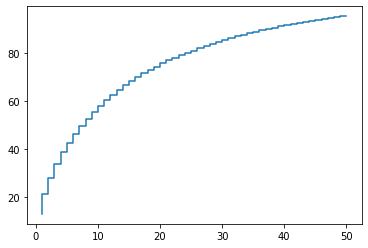

In [92]:
plt.step(list(var_exp.keys()),list(var_exp.values()))
plt.show()

In [93]:
pca = PCA (n_components= 38)
pca.fit(std_data)
(pca.explained_variance_ratio_*100).round(2).cumsum()

array([13.16, 21.27, 28.13, 34.03, 38.71, 42.63, 46.3 , 49.57, 52.6 ,
       55.45, 57.98, 60.43, 62.61, 64.72, 66.6 , 68.34, 69.98, 71.54,
       73.06, 74.38, 75.67, 76.89, 77.98, 79.04, 80.05, 81.02, 81.94,
       82.85, 83.74, 84.61, 85.39, 86.17, 86.91, 87.62, 88.29, 88.88,
       89.47, 90.04])

In [94]:
pca.transform(std_data).shape

(102, 38)

In [95]:
data_clus = pd.DataFrame(pca.transform(std_data), columns = ['PC{}'.format(i+1) for i in range(38)])
data_clus.index = mod_data.index

In [96]:
data_clus.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,2.508779,-2.059098,-1.584418,-2.088492,-0.202303,2.629262,0.141312,-0.258179,-0.969263,-0.072883,...,0.274594,-1.289807,-1.301752,-2.640428,-0.747464,0.069812,-0.729245,-0.289137,-0.265812,0.071802
ABNB,1.052795,4.444473,0.234520,-0.237378,-1.833663,0.127684,1.311946,-0.479320,2.976805,-6.345660,...,1.919134,3.899206,0.412855,1.220387,-2.933663,-1.467199,-2.187527,1.745256,-1.023764,-0.492250
ADBE,-3.219014,1.080023,-2.194774,-0.717679,0.892588,-1.634878,0.885902,0.496283,-1.697916,-1.381777,...,0.206993,1.186022,-0.721061,-0.830476,1.005554,0.872081,0.284651,0.039153,-0.530643,0.063841
ADI,-0.123312,-3.613646,-0.204188,3.208105,-0.300550,-2.749567,1.852539,-0.441778,-0.112619,0.349087,...,0.492689,0.854499,0.081958,0.306140,-0.308680,0.343213,0.726728,0.819607,-0.168936,1.666022
ADP,1.776947,-1.366474,-0.636562,0.379961,-2.531387,1.956196,1.958174,-0.545353,-0.077636,-1.944790,...,0.062147,-0.777171,-0.343856,0.262265,0.699786,1.321764,1.120539,-0.376106,0.542871,-0.414144


In [97]:
data_clus1 = data_clus.merge(nasdaq100_metrics_ratios,left_index=True, right_index=False, right_on='symbol')[['PC'+str(i) for i in range(1,39)]+['sector']]

In [98]:
data_clus12 = pd.get_dummies(data_clus1, columns = ['sector'],drop_first=True)

## 10.	After PCA, perform cluster analysis to identify cohorts. Define cohorts (cluster profiling) and share the insights. 

In [99]:
from sklearn.cluster import KMeans
clus_std = sc.fit_transform(data_clus12)

In [100]:
errors = {}
for i in range(1,100):
    kmm = KMeans(n_clusters=i, random_state = 12)
    kmm.fit(clus_std)
    errors.update({i :round(kmm.inertia_,2)})
err = pd.Series(errors)

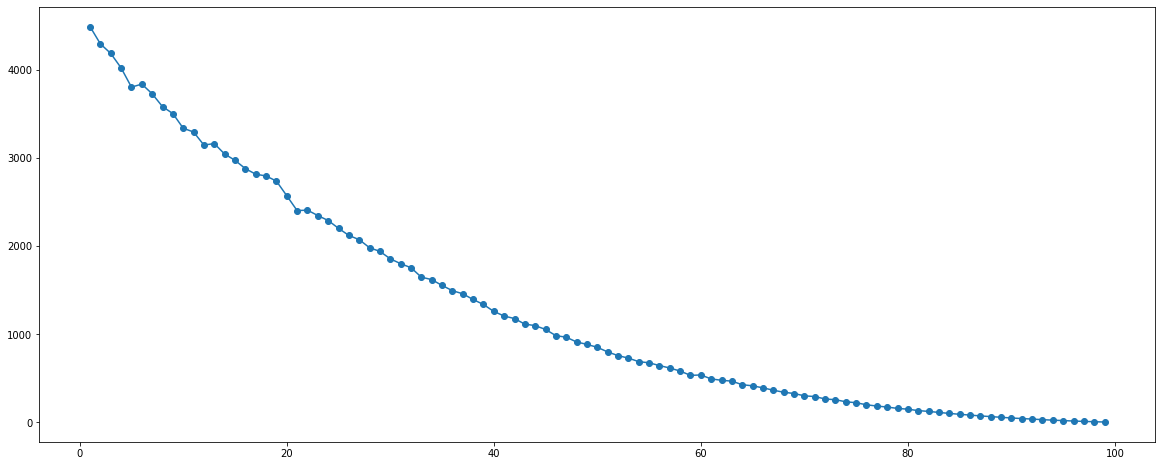

In [101]:
plt.figure(figsize = (20, 8))
plt.plot(err.index, err.values)
plt.scatter(err.index, err.values)
plt.show()

## elbow curve apprears inconclusive from business perspective. we will create 7 clusters because there are 7 sectors

In [102]:
kmm = KMeans(n_clusters=7, random_state = 12)
kmm.fit(clus_std)
clus_labs = kmm.labels_

In [103]:
#metrics_copy.drop(columns='cluster_label',inplace=True)

In [104]:
metrics_copy.insert(loc = 0, column='cluster_label', value=clus_labs)

In [105]:
metrics_copy.head(2)

,cluster_label,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,...,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest,market_cap,last_sale
0,6,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.660,0.72,0.74,0.83,1.08,...,71.04,-7.69,11.340,21.69,5.36,11.94,38.50,5.11,2625740143000,$151.45
1,4,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,0.825,0.55,0.64,0.36,0.50,...,96.46,609.09,23.355,40.08,31.58,31.27,-18.11,41.00,69569944167,$116.65


11.	Highlight companies from different sectors falling in the same cohort. Share your findings.

In [106]:
metrics_copy.groupby('cluster_label').size()

cluster_label
0     2
1    25
2     4
3     7
4    35
5     9
6    20
dtype: int64

In [107]:
metrics_copy[['symbol','cluster_label','sector']].sort_values(by='cluster_label')

,symbol,cluster_label,sector
49,ISRG,0,Health Care
70,NVDA,0,Information Technology
67,MU,1,Information Technology
30,CTSH,1,Information Technology
86,SIRI,1,Communication Services
...,...,...,...
48,INTU,6,Information Technology
100,ZM,6,Information Technology
65,MSFT,6,Information Technology
33,DOCU,6,Information Technology


In [108]:
for i in range(7):
    print(metrics_copy[['symbol','cluster_label','sector']].sort_values(by='cluster_label')[metrics_copy.cluster_label	 == i],'\n\n')

   symbol  cluster_label                  sector
49   ISRG              0             Health Care
70   NVDA              0  Information Technology 


   symbol  cluster_label                  sector
67     MU              1  Information Technology
30   CTSH              1  Information Technology
86   SIRI              1  Communication Services
66   MTCH              1  Communication Services
93    TXN              1  Information Technology
26   CRWD              1  Information Technology
23  CMCSA              1  Communication Services
58   MCHP              1  Information Technology
39   FISV              1  Information Technology
71   NXPI              1  Information Technology
73   OKTA              1  Information Technology
64   MRVL              1  Information Technology
15   AVGO              1  Information Technology
55   LRCX              1  Information Technology
95   VRSN              1  Information Technology
12   ANSS              1  Information Technology
76   PAYX        



```
# This is formatted as code
```

12.	Plot seasonality, trend, and irregular components over time for the historical stock prices of apple.

13.	Based on trend and seasonality, choose appropriate exponential smoothing method to forecast for week-end share price value for next 12.

14.	Perform augmented Dickey–Fuller test (ADF) to check for stationary for apple stock.

15.	For the historical stock prices of apple, look at the ACF and PACF plots and strategize for ARIMA modeling. Find appropriate values of p, d and q and forecast for month-end share price value for next 12 months. For model validation, find out MAPE of 12 months.

16.	Pick up the top 2 companies from each sector based on market capitalization. Create trend charts for the last 5 years for month-end share price (use variable - ‘Adjusted close’). Showcase 12 months rolling mean and standard deviation within the same chart. Share your observations regarding the stationarity for all the companies.

17.	Perform ADF test to check for stationary for all the companies selected in the last step.

18.	Perform batch forecasting for top 2 companies from each sector based on market capitalization for week-end share price value for next 12 months using auto-arima. You may want to leverage the library ‘pmdarima’ for auto-arima. Use your discretion. For model validation, find out MAPE of 12 months.

In [109]:
## Plot seasonality, trend, and irregular components over time for the historical stock prices of apple.

In [110]:
master_data_AAPL = master_data[master_data.Symbol == 'AAPL'][['Date','Adj Close']]

In [111]:
master_data_AAPL.columns

Index(['Date', 'Adj Close'], dtype='object')

In [112]:
master_data.tail(2)

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
426757,ZS,2022-10-21,150.919998,142.710007,148.979996,150.479996,2140900.0,150.479996
426758,ZS,2022-10-24,151.460007,144.300003,151.360001,148.669998,1375200.0,148.669998


In [113]:
start = dt.datetime(2015, 1, 1)
start

datetime.datetime(2015, 1, 1, 0, 0)

In [114]:
data_AAPL_2015 = master_data_AAPL[master_data_AAPL.Date>=start]

In [115]:
apple_ts = data_AAPL_2015.set_index('Date')

In [116]:
apple_ts.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24'],
              dtype='datetime64[ns]', name='Date', length=1967, freq=None)

In [117]:
apple_ts.sort_index(inplace=True)

In [118]:
def decompose(time_series):
    ts_log = np.log(time_series)
    decompose = seasonal_decompose(ts_log, period = 12)
    trend = decompose.trend
    seasonal = decompose.seasonal
    irregular = decompose.resid 
    f,ax = plt.subplots(4,1,figsize = (10,10))
    ax[0].plot(ts_log, label = 'Original')
    ax[0].legend(loc ='best')
    ax[1].plot(trend, label = 'trend')
    ax[1].legend(loc ='best')
    ax[2].plot(seasonal, label = 'seasonal')
    ax[2].legend(loc ='best')
    ax[3].plot(irregular, label = 'irregular')
    ax[3].legend(loc ='best')
    plt.show()
    return irregular

<Figure size 1800x576 with 0 Axes>

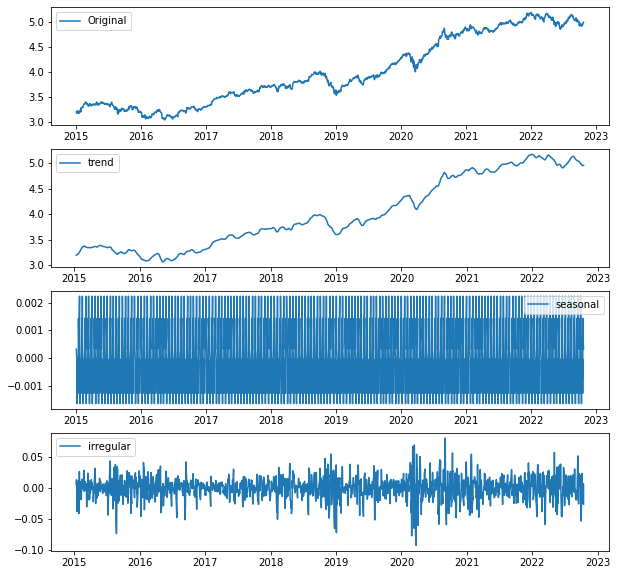

In [119]:
plt.figure(figsize=(25,8))
ts_decomposed = decompose(apple_ts)
plt.show()

In [120]:
apple_ts.squeeze()[1:10]

Date
2015-01-05    23.910093
2015-01-06    23.912338
2015-01-07    24.247652
2015-01-08    25.179300
2015-01-09    25.206299
2015-01-12    24.585203
2015-01-13    24.803484
2015-01-14    24.708967
2015-01-15    24.038361
Name: Adj Close, dtype: float64

In [121]:
apple_ts.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24'],
              dtype='datetime64[ns]', name='Date', length=1967, freq=None)

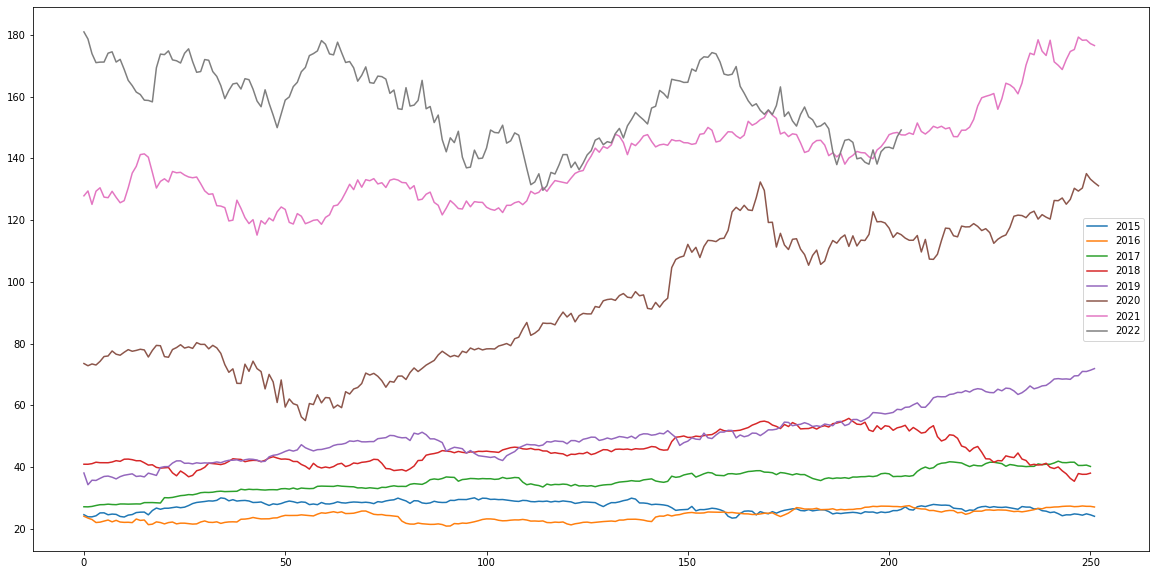

In [122]:
# Checking for seasonality again
plt.figure(figsize=(20,10))
for i in (range(2015,2023)):
    x = list(apple_ts.squeeze()[str(i)])
    plt.plot(x,label=i)


plt.legend()    
plt.show()

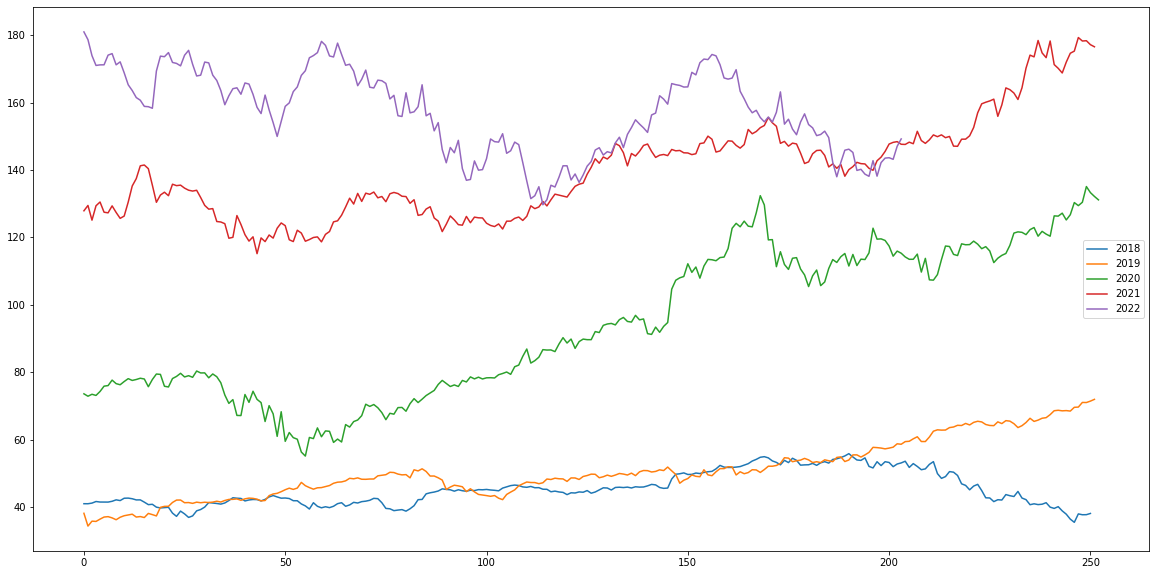

In [123]:
# Checking for trend again
plt.figure(figsize=(20,10))
for i in (range(2018,2023)):
    x = list(apple_ts.squeeze()[str(i)])
    plt.plot(x,label=i)

plt.legend()
plt.show()

In [124]:
bb = apple_ts.copy()

In [125]:
bb.reset_index(inplace=True)

In [126]:
# bb['month'] = bb.Date.dt.month
# bb['year'] = bb.Date.dt.year
bb['weekday'] = bb.Date.dt.weekday

In [127]:
bb

,Date,Adj Close,weekday
0,2015-01-02,24.603207,4
1,2015-01-05,23.910093,0
2,2015-01-06,23.912338,1
3,2015-01-07,24.247652,2
4,2015-01-08,25.179300,3
...,...,...,...
1962,2022-10-18,143.511932,1
1963,2022-10-19,143.621750,2
1964,2022-10-20,143.152527,3
1965,2022-10-21,147.026108,4


In [128]:
week_end_data = bb[bb.weekday == 4]
week_end_data.tail(10)

,Date,Adj Close,weekday
1921,2022-08-19,171.235947,4
1926,2022-08-26,163.349014,4
1931,2022-09-02,155.551956,4
1935,2022-09-09,157.109375,4
1940,2022-09-16,150.450424,4
1945,2022-09-23,150.180862,4
1950,2022-09-30,137.971115,4
1955,2022-10-07,139.857986,4
1960,2022-10-14,138.150833,4
1965,2022-10-21,147.026108,4


In [129]:
week_end_data.drop(columns='weekday', inplace=True)

In [130]:
week_end_data.set_index('Date', inplace=True)

In [131]:
apple_weekend = week_end_data.squeeze()

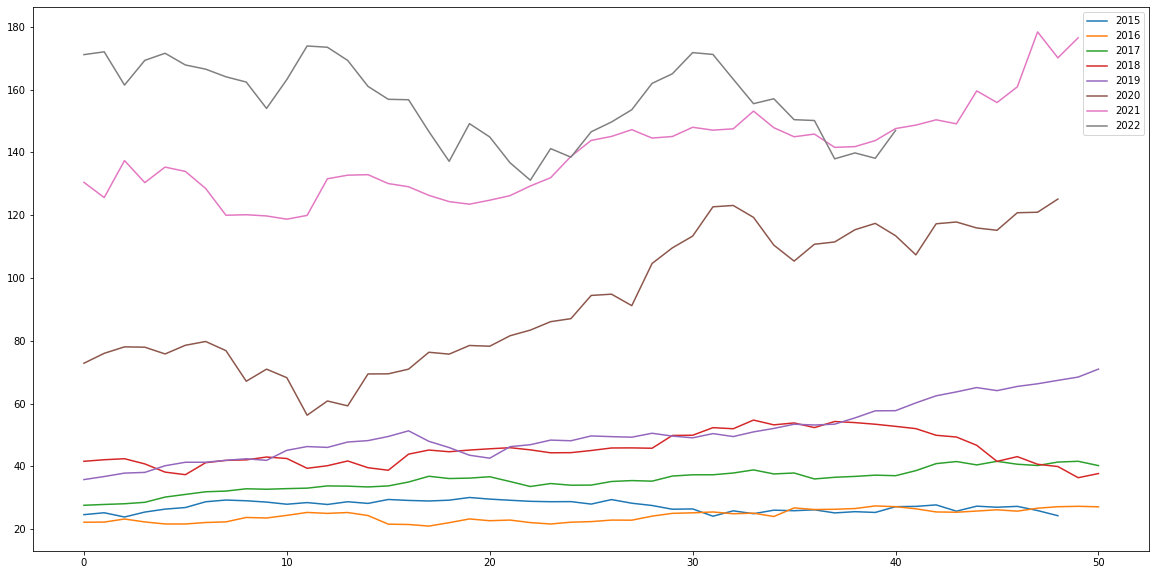

In [132]:
# Checking for seasonality
plt.figure(figsize=(20,10))
for i in (range(2015,2023)):
    x = list(apple_weekend[str(i)])
    plt.plot(x,label=i)


plt.legend()    
plt.show()

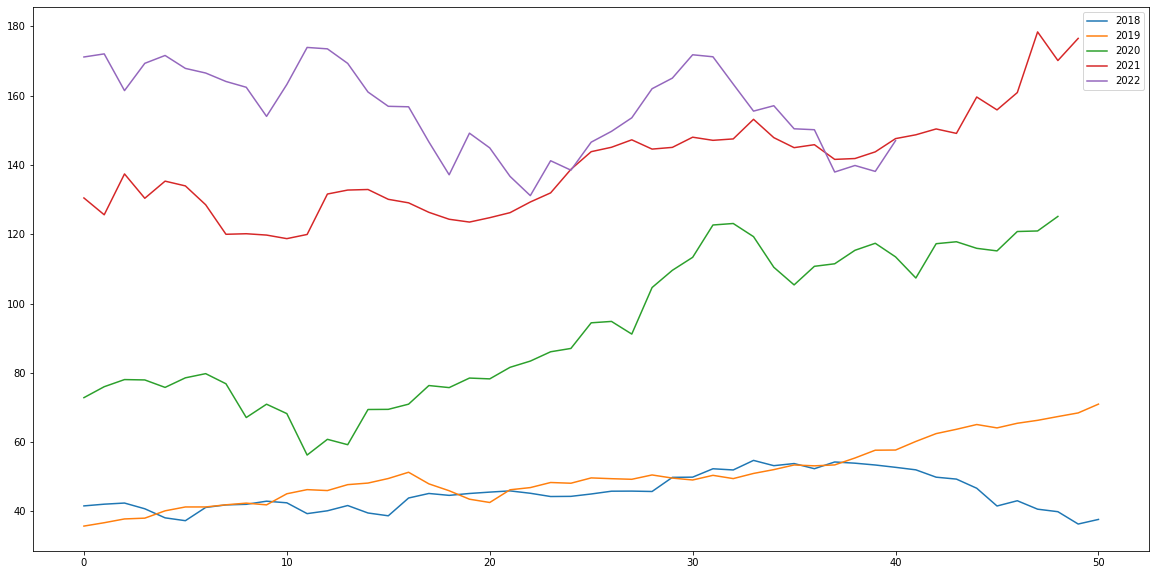

In [133]:
# Checking for trend
plt.figure(figsize=(20,10))
for i in (range(2018,2023)):
    x = list(apple_weekend[str(i)])
    plt.plot(x,label=i)

plt.legend()
plt.show()

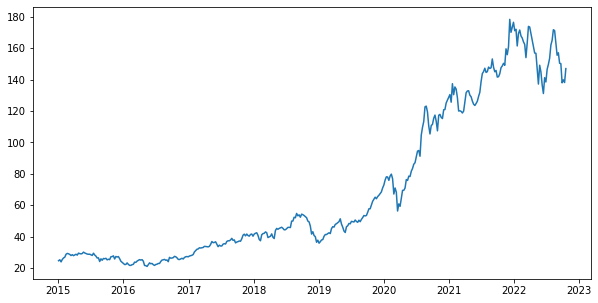

In [134]:
plt.figure(figsize = (10,5))
plt.plot(apple_weekend)
plt.show()

In [135]:
# Trend and seasonality observed. Hence triple exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [136]:
len(apple_weekend)

393

In [137]:
apple_weekend

Date
2015-01-02     24.603207
2015-01-09     25.206299
2015-01-16     23.851587
2015-01-23     25.424585
2015-01-30     26.365240
                 ...    
2022-09-23    150.180862
2022-09-30    137.971115
2022-10-07    139.857986
2022-10-14    138.150833
2022-10-21    147.026108
Name: Adj Close, Length: 393, dtype: float64

In [138]:
train = apple_weekend[:-12]
test = apple_weekend[-12:]

In [139]:
train

Date
2015-01-02     24.603207
2015-01-09     25.206299
2015-01-16     23.851587
2015-01-23     25.424585
2015-01-30     26.365240
                 ...    
2022-07-01    138.507507
2022-07-08    146.592850
2022-07-15    149.713348
2022-07-22    153.621414
2022-07-29    162.015808
Name: Adj Close, Length: 381, dtype: float64

In [140]:
train.to_excel('exp_sm.xlsx')

In [141]:
model=ExponentialSmoothing(train,trend='mul', seasonal='add', seasonal_periods=7).fit()

In [142]:
forecast = model.forecast(12)

In [143]:
forecast

381    162.455159
382    162.669776
383    163.556725
384    164.992826
385    164.976000
386    165.641069
387    165.669904
388    166.449082
389    166.672209
390    167.567686
391    169.012333
392    169.004072
dtype: float64

In [144]:
from sklearn.metrics import mean_absolute_percentage_error

In [145]:
mean_absolute_percentage_error(test,forecast)

0.10228410324411297

In [146]:
model_final = ExponentialSmoothing(apple_weekend,trend='mul', seasonal='add', seasonal_periods=12).fit()

In [147]:
model_final.forecast(12)

393    146.087249
394    146.433423
395    146.885425
396    146.489184
397    146.947246
398    148.090287
399    149.152870
400    149.193321
401    149.095874
402    148.965698
403    149.622787
404    150.876156
dtype: float64

In [148]:
# Perform augmented Dickey–Fuller test (ADF) to check for stationary for apple stock.

# For the historical stock prices of apple, look at the ACF and PACF plots and strategize for ARIMA modeling. 

#Find appropriate values of p, d and q and forecast for month-end share price value for next 12 months. For model validation, find out MAPE of 12 months.


In [149]:
def test_stationarity(ts, title=""):
    # mean and variance for the series
    f , ax = plt.subplots(1,2, figsize = (25,5))
    ax[0].plot(ts, label = 'Original')
    ax[0].set_title(title, size = 30)
    
    # rolling stats
    rolling_mean = ts.rolling(window = 12).mean()
    rolling_std = ts.rolling(window = 12).std()
    
    ax[0].plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    ax[0].plot(rolling_std, color = 'black', label = 'Rolling STD')
    ax[0].legend(loc = 'best')
    
    # Adfuller test 
    dftest = adfuller(ts)
    df = pd.Series(dftest[:4], index = ['Test Statistics', 'p-value', '# Lags Used', '# Obs used'])
    
    if (df['p-value'] >= 0.05):
        ax[1].annotate('Fail to Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Non Stationary'.center(35), xy = (0.25, 0.7), size = 25)
    else : 
        ax[1].annotate('Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Stationary'.center(35), xy = (0.25, 0.7), size = 25)
    
    c = 0.4
    for i in range(4):
        text = '{}    : {:.4f}'.format(df.index[i], df[i])
        ax[1].annotate(text, xy = (0.1, c), size = 15)
        c -= 0.1
    c = 0.4
    for i in dftest[4].keys():
        text = 'Critical Value {}    : {:.4f}'.format(i, dftest[4][i])
        ax[1].annotate(text, xy = (0.5, c), size = 15)
        c -= 0.1  
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[1].axis('off')
    plt.show()

In [150]:
apple_all = master_data[master_data.Symbol == 'AAPL'][['Date','Adj Close']]

In [151]:
cc = apple_all.copy()
cc

,Date,Adj Close
0,2002-11-01,0.249028
1,2002-11-04,0.257095
2,2002-11-05,0.257248
3,2002-11-06,0.262119
4,2002-11-07,0.243548
...,...,...
5024,2022-10-18,143.511932
5025,2022-10-19,143.621750
5026,2022-10-20,143.152527
5027,2022-10-21,147.026108


In [152]:
cc['month'] = cc.Date.dt.month
cc['year'] = cc.Date.dt.year
cc['mon_yr'] = cc.month.astype(str) + '-' + cc.year.astype(str)

In [153]:
mon_end = cc.groupby('mon_yr').agg(max)['Date']

In [154]:
month_end_Data_apl = cc[cc.Date.isin(mon_end.values)]
month_end_Data_apl.sort_values('Date' , inplace = True)

In [155]:
month_end_Data_apl

,Date,Adj Close,month,year,mon_yr
19,2002-11-29,0.235937,11,2002,11-2002
40,2002-12-31,0.218128,12,2002,12-2002
61,2003-01-31,0.218585,1,2003,1-2003
80,2003-02-28,0.228479,2,2003,2-2003
101,2003-03-31,0.215236,3,2003,3-2003
...,...,...,...,...,...
4948,2022-06-30,136.304245,6,2022,6-2022
4968,2022-07-29,162.015808,7,2022,7-2022
4991,2022-08-31,156.959625,8,2022,8-2022
5012,2022-09-30,137.971115,9,2022,9-2022


In [156]:
st_date = dt.datetime(2018,1,1)

In [157]:
apple_monthy2018 = month_end_Data_apl.loc[month_end_Data_apl.Date >= st_date, ['Date', 'Adj Close']].set_index('Date').squeeze()
apple_monthy2018[:5]

Date
2018-01-31    39.802277
2018-02-28    42.516209
2018-03-29    40.048103
2018-04-30    39.446598
2018-05-31    44.776775
Name: Adj Close, dtype: float64

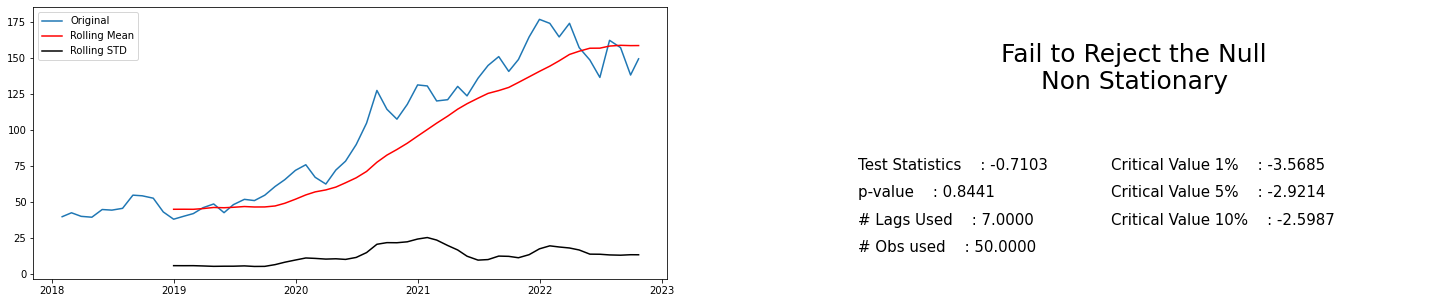

In [158]:
test_stationarity(apple_monthy2018)

In [159]:
# The series is non-stationary

In [160]:
ts_log = np.log(apple_monthy2018)

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [162]:
decomposition = seasonal_decompose(ts_log, period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

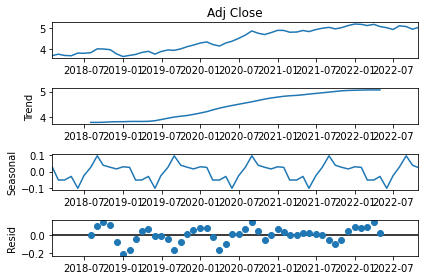

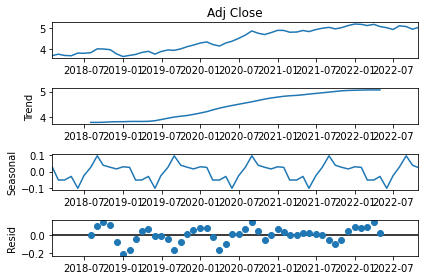

In [163]:
decomposition.plot()

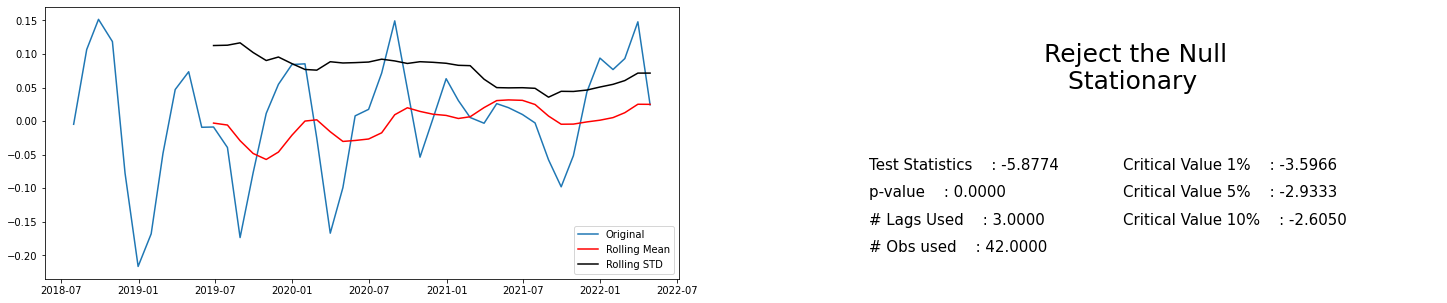

In [164]:
test_stationarity(residual.dropna())

In [165]:
residual.dropna(inplace = True)

In [166]:
from statsmodels.tsa.stattools import acf, pacf

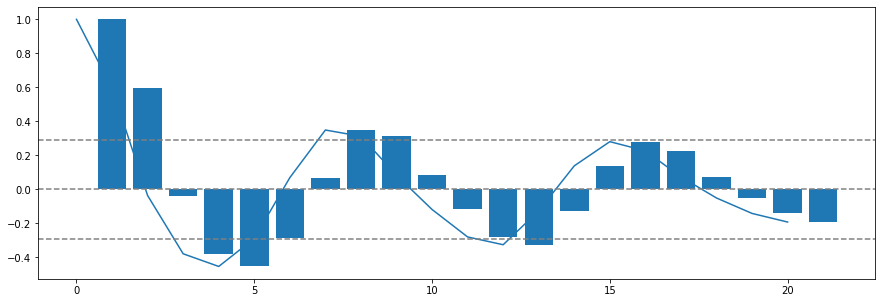

In [167]:
lag_acf = acf(residual, nlags = 20)
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_acf)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.show()

ACF : q term = lag = 2

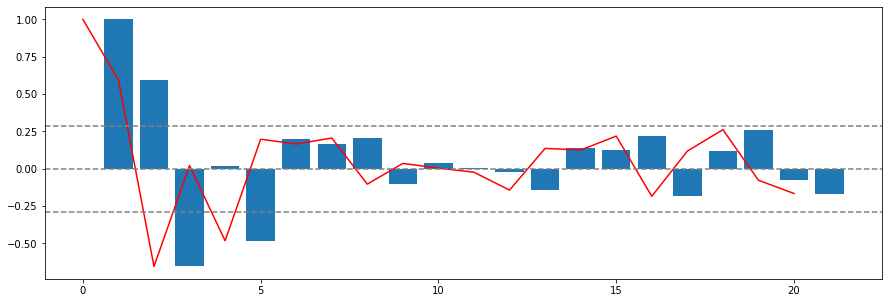

In [168]:
lag_pacf = pacf(residual, nlags = 20, method= 'ols')
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_pacf)
plt.plot(lag_pacf, color = 'red')
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.show()

PACF p term = 4

In [169]:
from statsmodels.tsa.arima.model import ARIMA

In [170]:
train= apple_monthy2018[:-6]
test = apple_monthy2018[-6:]

In [171]:
len(apple_monthy2018), train.size, test.size

(58, 52, 6)

In [172]:
#ARIMA
model = ARIMA(train, order=(4, 2, 2))  
results_ARIMA = model.fit() 
train_pred = results_ARIMA.fittedvalues


In [173]:
test.index

DatetimeIndex(['2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-24'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [174]:
forecast = results_ARIMA.forecast(6)

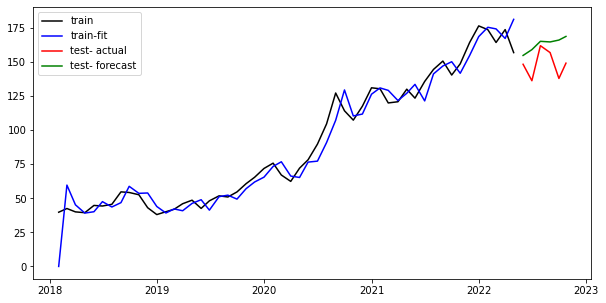

In [175]:
plt.figure(figsize = (10,5))
plt.plot(train, color = 'black', label = 'train')
plt.plot(train_pred, color = 'blue', label = 'train-fit')
plt.plot(test, color = 'red', label = 'test- actual')
plt.plot(test.index, forecast,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

In [176]:
mean_absolute_percentage_error(y_true = test, y_pred = forecast)

0.10274216821748973

Pick up the top 2 companies from each sector based on market capitalization. Create trend charts for the last 5 years for month-end share price (use variable - ‘Adjusted close’). Showcase 12 months rolling mean and standard deviation within the same chart. Share your observations regarding the stationarity for all the companies.


In [177]:
sorted_metrics = metrics_copy.sort_values(['sector', 'market_cap'], ascending = False)

In [178]:
sector_market_cap = sorted_metrics.groupby('sector').head(2)[['sector','symbol', 'market_cap']]

In [179]:
month_end_Data

,Date,Symbol,Adj Close,YOY,MOM
19,2002-11-29,AAPL,0.235937,NaN,NaN
40,2002-12-31,AAPL,0.218128,NaN,-7.548445
61,2003-01-31,AAPL,0.218585,NaN,0.209464
80,2003-02-28,AAPL,0.228479,NaN,4.526399
101,2003-03-31,AAPL,0.215236,NaN,-5.796232
...,...,...,...,...,...
426678,2022-06-30,ZS,149.509995,-30.801631,-2.338495
426698,2022-07-29,ZS,155.059998,-34.271546,3.712128
426721,2022-08-31,ZS,159.240005,-42.789392,2.695736
426742,2022-09-30,ZS,164.369995,-37.315996,3.221546


In [180]:
trend_data = month_end_Data[month_end_Data.Symbol.isin(sector_market_cap.symbol)].copy()

In [181]:
trend_data.Symbol.nunique()

14

In [182]:
last_5_start = dt.datetime.today() - rd(years = 5, day = 1)
last_5_start

datetime.datetime(2017, 11, 1, 13, 19, 27, 39787)

In [183]:
data_last_5 = trend_data[trend_data.Date > last_5_start].copy()

data_last_5.Symbol.nunique()

14

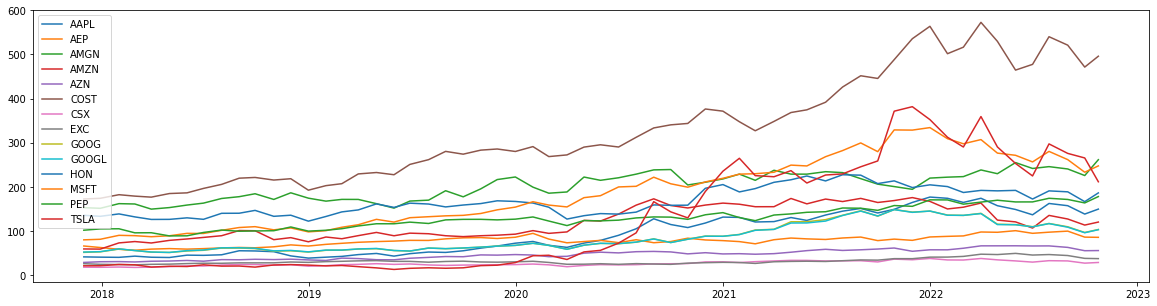

In [184]:
plt.figure(figsize = (20,5))
for comp in data_last_5.Symbol.unique():
  temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
  plt.plot(temp_ts, label = comp)
  plt.legend()
plt.show()

<Figure size 1440x360 with 0 Axes>

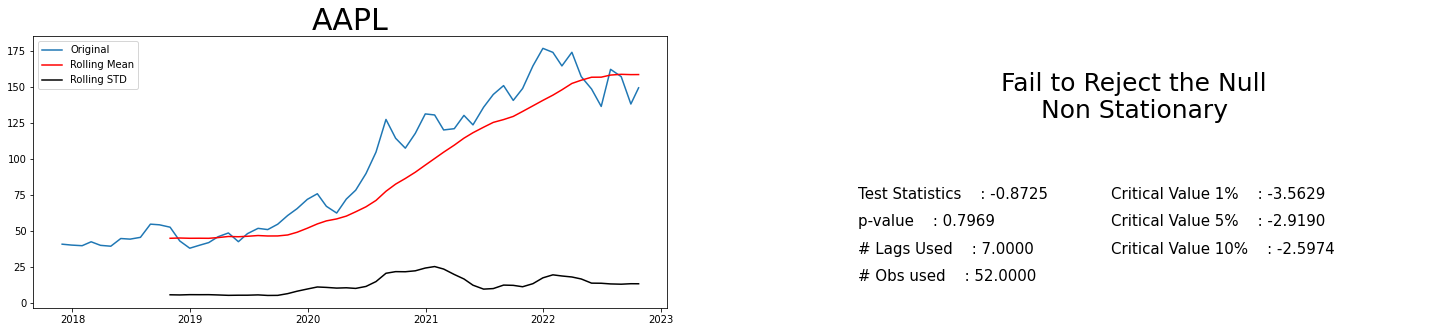

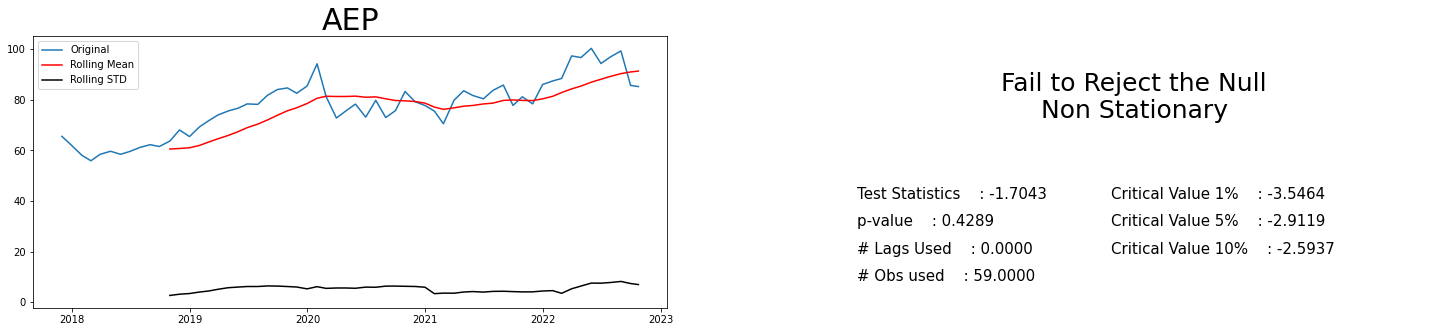

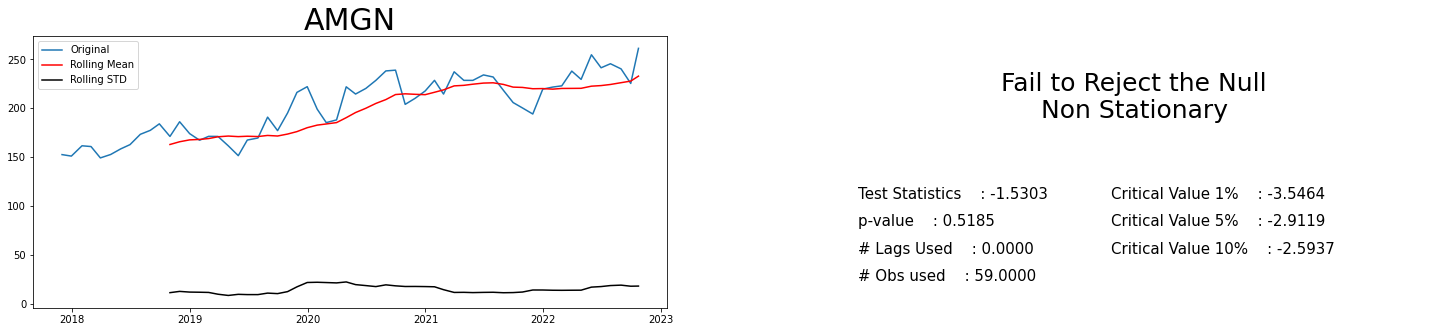

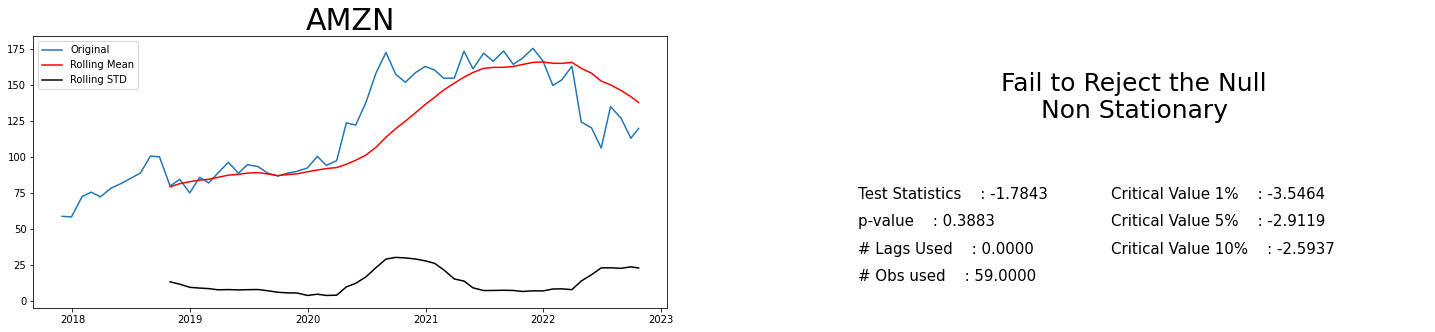

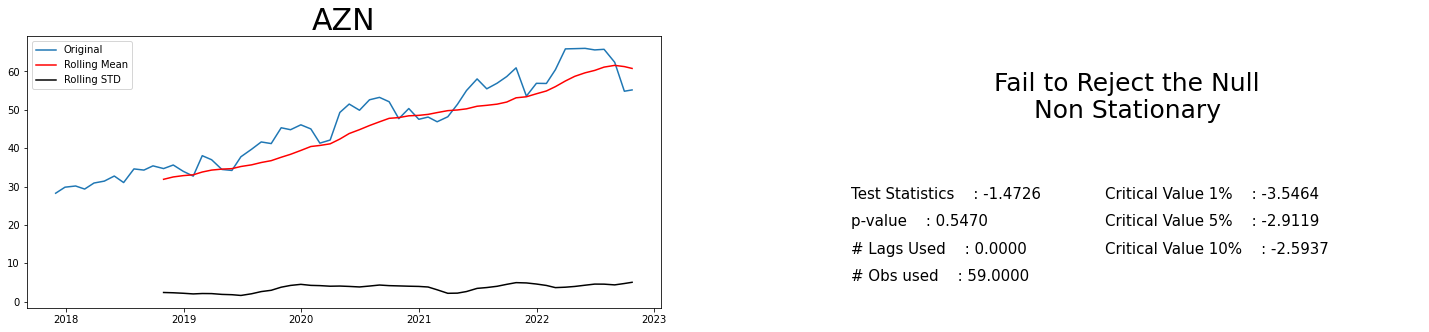

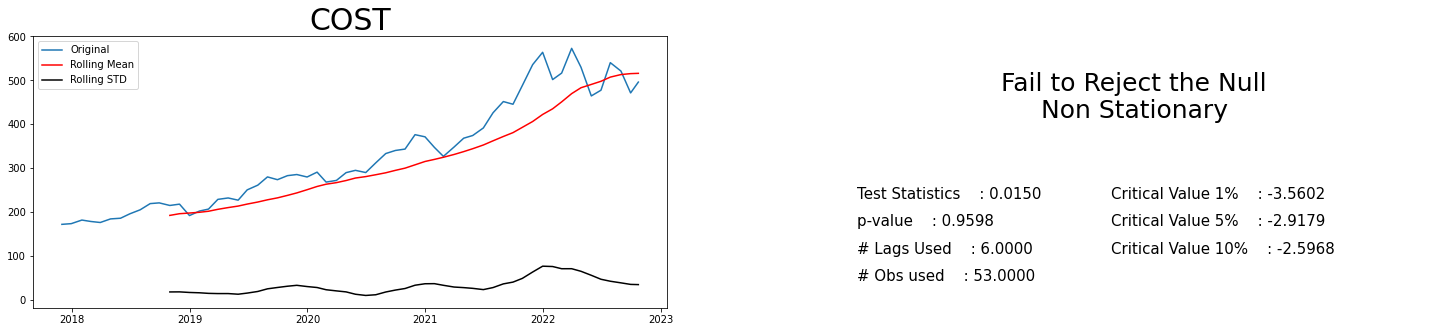

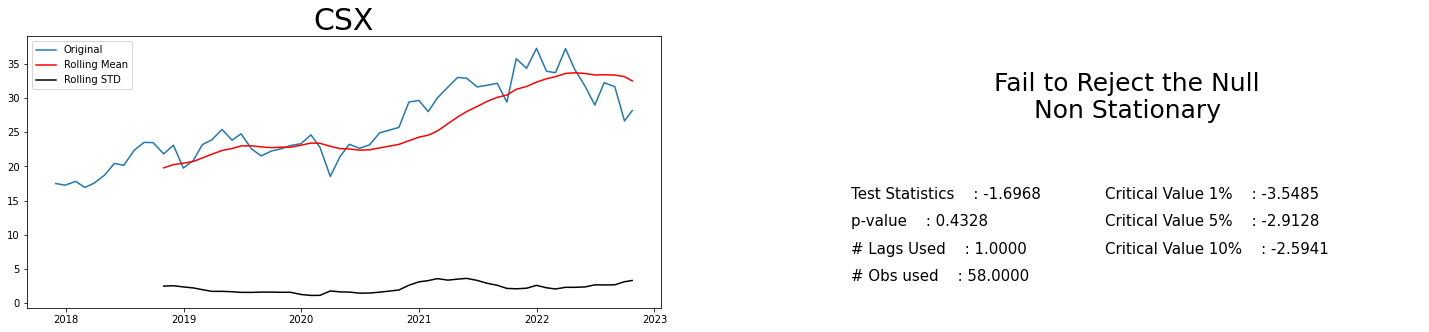

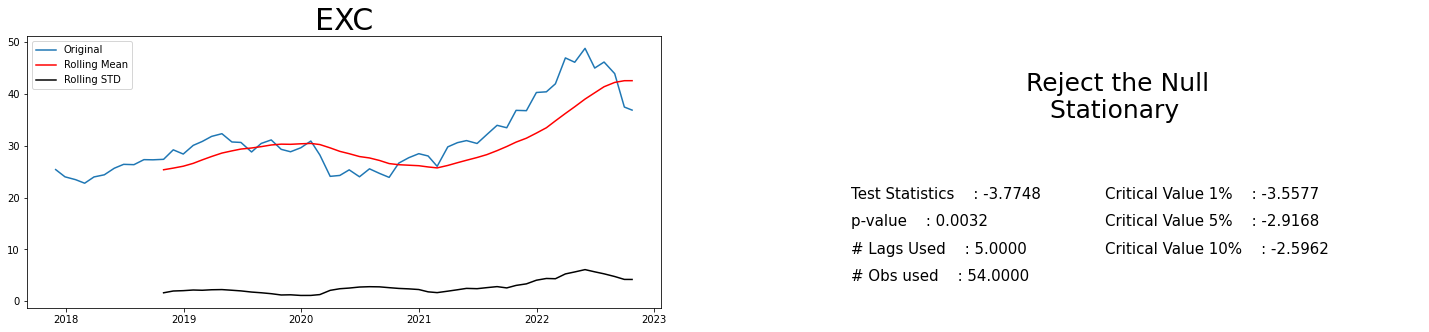

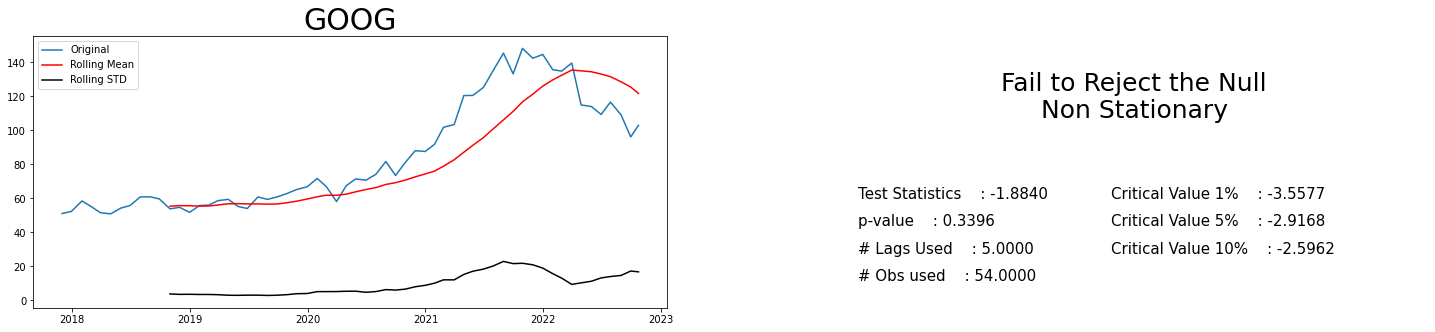

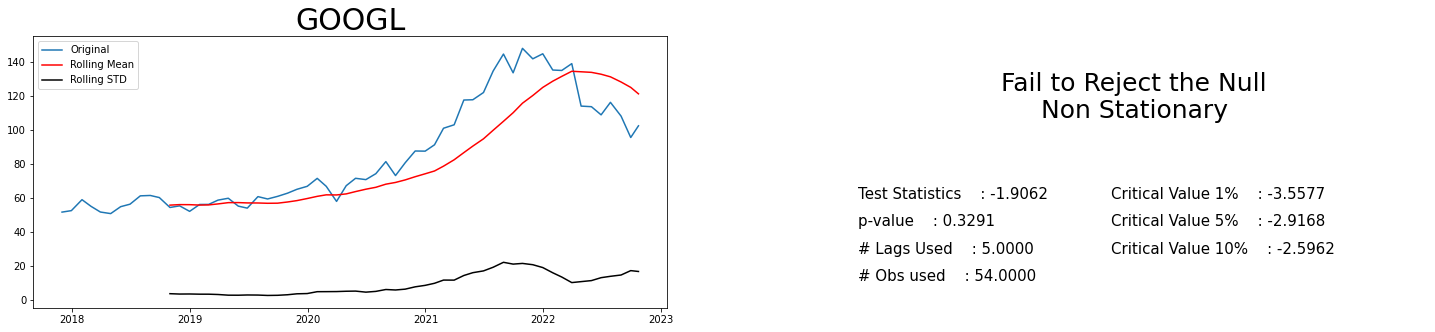

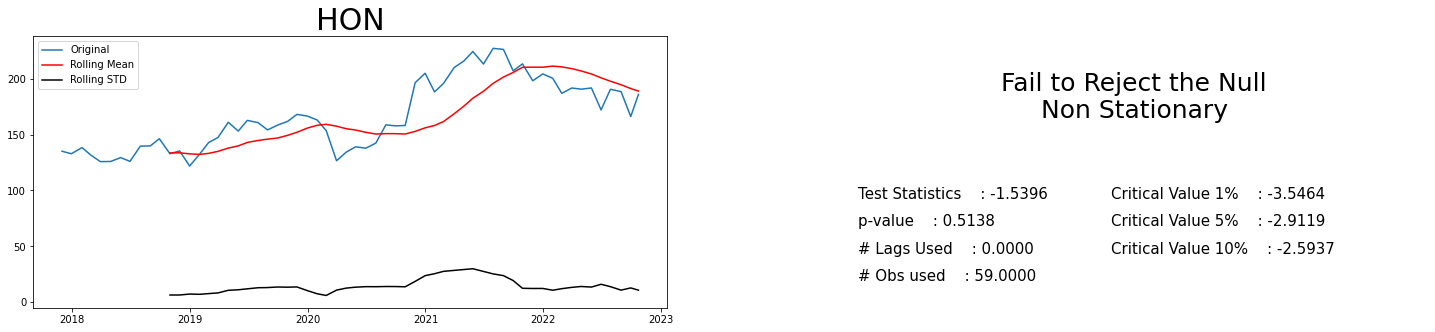

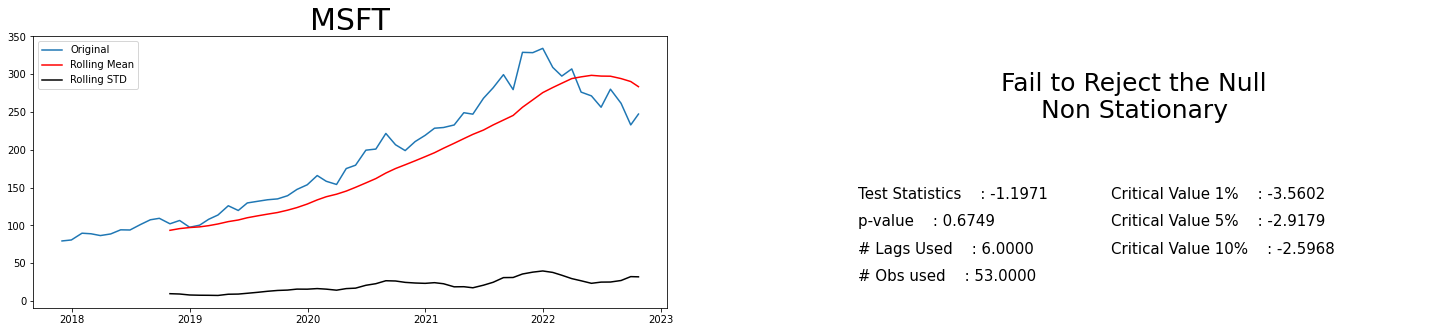

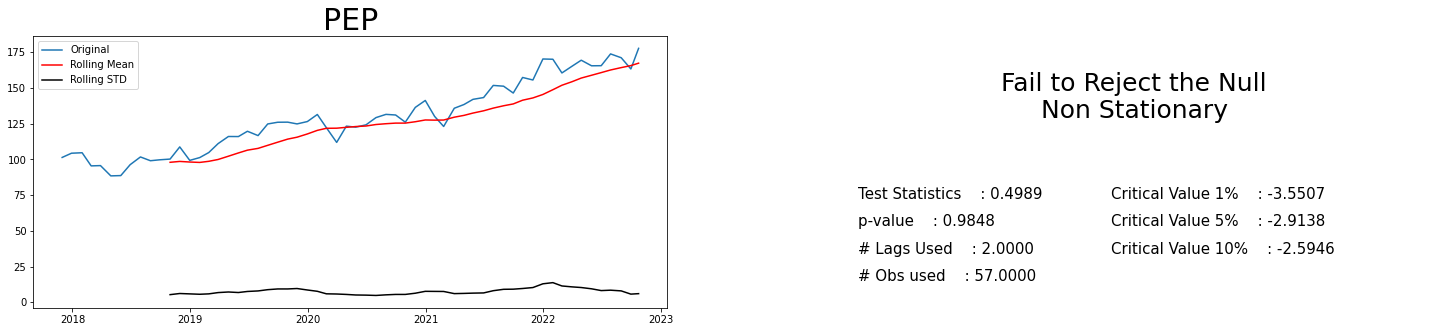

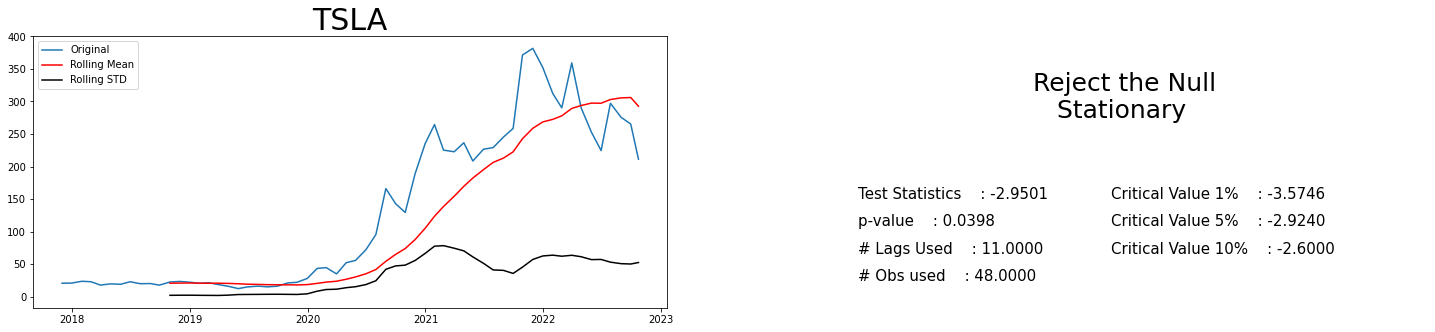

In [185]:
plt.figure(figsize = (20,5))
for comp in data_last_5.Symbol.unique():
  temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
  test_stationarity(temp_ts, comp)

Perform batch forecasting for top 2 companies from each sector based on market capitalization for week-end share price value for next 12 months using auto-arima. You may want to leverage the library ‘pmdarima’ for auto-arima. Use your discretion. For model validation, find out MAPE of 12 months.



In [186]:
#! pip install pmdarima

In [187]:
from pmdarima.arima import auto_arima

In [188]:
def auto_arima_foo(ts, company ):
  train = ts[:-12]
  test = ts [-12:]
  model = auto_arima(train, trace = False )
  model.fit(train)
  fit = model.predict_in_sample(train)
  forecast = model.predict(n_periods=len(test))
  mape = mean_absolute_percentage_error(y_true = test, y_pred = forecast )
  print('Best model parameters for {} is {}'.format(company, model ))
  return mape

In [189]:
result = {}
for comp in data_last_5.Symbol.unique():
  temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
  result.update({comp : auto_arima_foo(temp_ts, comp)})

Best model parameters for AAPL is  ARIMA(2,1,2)(0,0,0)[0] intercept
Best model parameters for AEP is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for AMGN is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for AMZN is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for AZN is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for COST is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for CSX is  ARIMA(0,1,1)(0,0,0)[0] intercept
Best model parameters for EXC is  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model parameters for GOOG is  ARIMA(5,2,0)(0,0,0)[0]          
Best model parameters for GOOGL is  ARIMA(5,2,0)(0,0,0)[0]          
Best model parameters for HON is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for MSFT is  ARIMA(1,2,1)(0,0,0)[0]          
Best model parameters for PEP is  ARIMA(0,1,2)(0,0,0)[0] intercept
Best model parameters for TSLA is  ARIMA(0,2,1)(0,0,0)[0]          


In [190]:
result

{'AAPL': 0.11775373111272631,
 'AEP': 0.1123880349353218,
 'AMGN': 0.14019654107330873,
 'AMZN': 0.37967862152464305,
 'AZN': 0.08965947180498778,
 'COST': 0.08353647184611956,
 'CSX': 0.15452682078476707,
 'EXC': 0.1920377525225365,
 'GOOG': 0.4968724906879114,
 'GOOGL': 0.5439989480364388,
 'HON': 0.13248488401394368,
 'MSFT': 0.34833083682058286,
 'PEP': 0.040708116510733715,
 'TSLA': 0.7817791435177378}